In [105]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### Train Data: Yelp

In [106]:
# Grab and process the raw data.
yelp_path = 'Chall-2_2_7/yelp_labelled.txt'          
yelp_raw = pd.read_csv(yelp_path, delimiter= '\t', header=None)
yelp_raw.columns = ['sentance', 'score']

amazon_path = 'Chall-2_2_7/amazon_cells_labelled.txt'
amazon_raw = pd.read_csv(amazon_path, delimiter= '\t', header=None)
amazon_raw.columns = ['sentance', 'score']

In [107]:
neg_words = ['nasty', 'angry', 'didn\'t', 'slow',
             'dirty', 'overpriced', 'underwhelming',
             'rude', 'cold', 'bad', 'forever']

pos_words = ['love', 'great', 'highly', 'pleasure', 'amazing', 'pleasure', 'good',
              'fav', 'excellent']

for key in pos_words:
    yelp_raw[str(key)] = yelp_raw.sentance.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [108]:
yelp_raw_pos = yelp_raw.loc[yelp_raw['score'] == 1]
yelp_raw_neg = yelp_raw.loc[yelp_raw['score'] == 0]

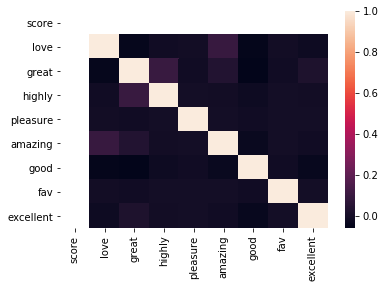

In [109]:
sns.heatmap(yelp_raw_pos.corr())

In [110]:
# Identify the data using 
data = yelp_raw[pos_words]
target = yelp_raw['score']

### Hold-out Data: Amazon

In [111]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 412


In [112]:
pos_words_2 = ['love', 'great', 'highly', 'pleasure', 'amazing', 'pleasure', 'good',
              'fav', 'excellent']

for key in pos_words_2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_raw[str(key)] = amazon_raw.sentance.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [113]:
# Identify the data using 
data_2 = amazon_raw[pos_words_2]
target_2 = amazon_raw['score']

In [114]:
# Classify, storing the result in a new variable.
y_pred_2 = bnb.predict(data_2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_2.shape[0],
    (target_2 != y_pred_2).sum()
))

Number of mislabeled points out of a total 1000 points : 417
